Employee turn-over (also known as "employee churn") is a costly problem for companies. The true cost of replacing an employee can often be quite large. A study by the Center for American Progress found that companies typically pay about one-fifth of an employee’s salary to replace that employee, and the cost can significantly increase if executives or highest-paid employees are to be replaced. In other words, the cost of replacing employees for most employers remains significant. This is due to the amount of time spent to interview and find a replacement, sign-on bonuses, and the loss of productivity for several months while the new employee gets accustomed to the new role.



# Problem Statement

Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as possibly planning new hiring in advance. I will be usign a step-by-step systematic approach using a method that could be used for a variety of ML problems. This project would fall under what is commonly known as "HR Anlytics", "People Analytics".

In this study, we will attempt to solve the following problem statement is:

* What is the likelihood of an active employee leaving the company?
* What are the key indicators of an employee leaving the company?
* What policies or strategies can be adopted based on the results to improve employee retention?

Given that we have data on former employees, this is a standard supervised classification problem where the label is a binary variable, 0 (active employee), 1 (former employee). In this study, our target variable Y is the probability of an employee leaving the company.

## Importing Python Libraries

In [253]:
import warnings
warnings.filterwarnings('ignore')

In [254]:
# importing libraries for data handling and analysis
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm


In [255]:
# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#py.initnotebookmode(connected=True) # this code, allow us to work with offline plotly version
# Using plotly + cufflinks in offline mode
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)

In [256]:
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [257]:
# importing misceallenous libraries
import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse

## Importing the data

> Let's import the dataset and make of a copy of the source file for this analysis. <br>  The dataset contains 1,470 rows and 35 columns.

In [258]:
import os
print(os.listdir("../input"))

['ibm-hr-analytics-attrition-dataset']


In [259]:
# Read Excel file
df_sourcefile = pd.read_csv('../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
print("Shape of dataframe is: {}".format(df_sourcefile.shape))

Shape of dataframe is: (1470, 35)


In [260]:
# Make a copy of the original sourcefile
df_HR = df_sourcefile.copy()

## EDA Analysis

In [261]:
df_HR.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [262]:
df_HR.describe(include='O').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [263]:
# Changing the default pandas settings to see the full table
pd.set_option('display.max_rows', 1000); pd.set_option('display.max_columns', 1000); 

In [264]:
# Dataset first 5 rows
df_HR.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [265]:
# Dataset columns
df_HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

> The dataset contains several numerical and categorical columns providing various information on employee's personal and employment details.

In [266]:
df_HR.columns.to_series().groupby(df_HR.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [267]:
# Columns datatypes and missign values
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [268]:
df_HR.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

> As we can see there is no missing value inside the df.

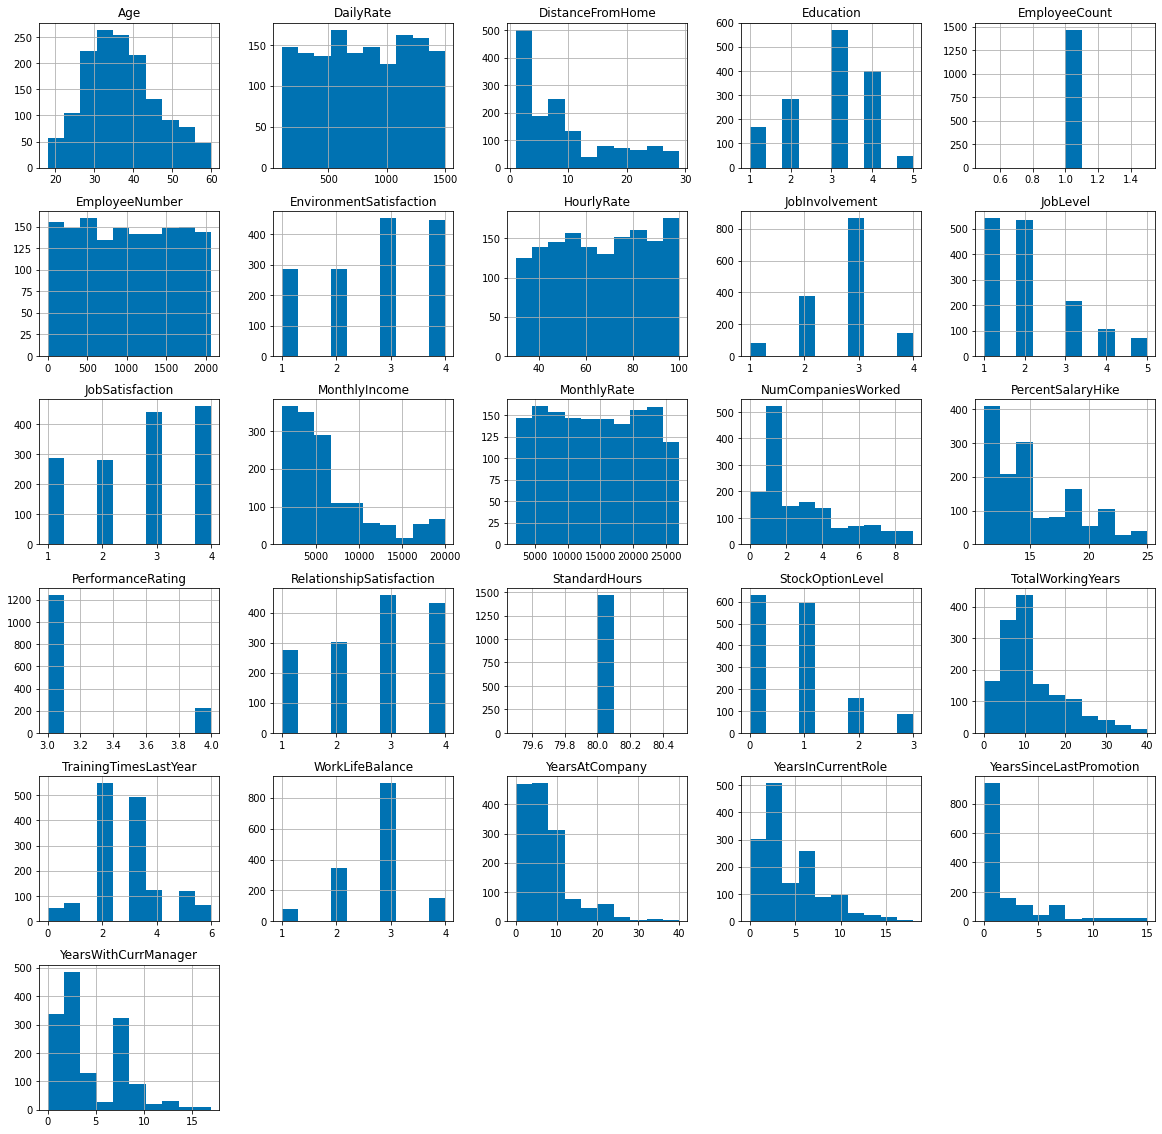

In [269]:
df_HR.hist(figsize=(20,20))
plt.show()

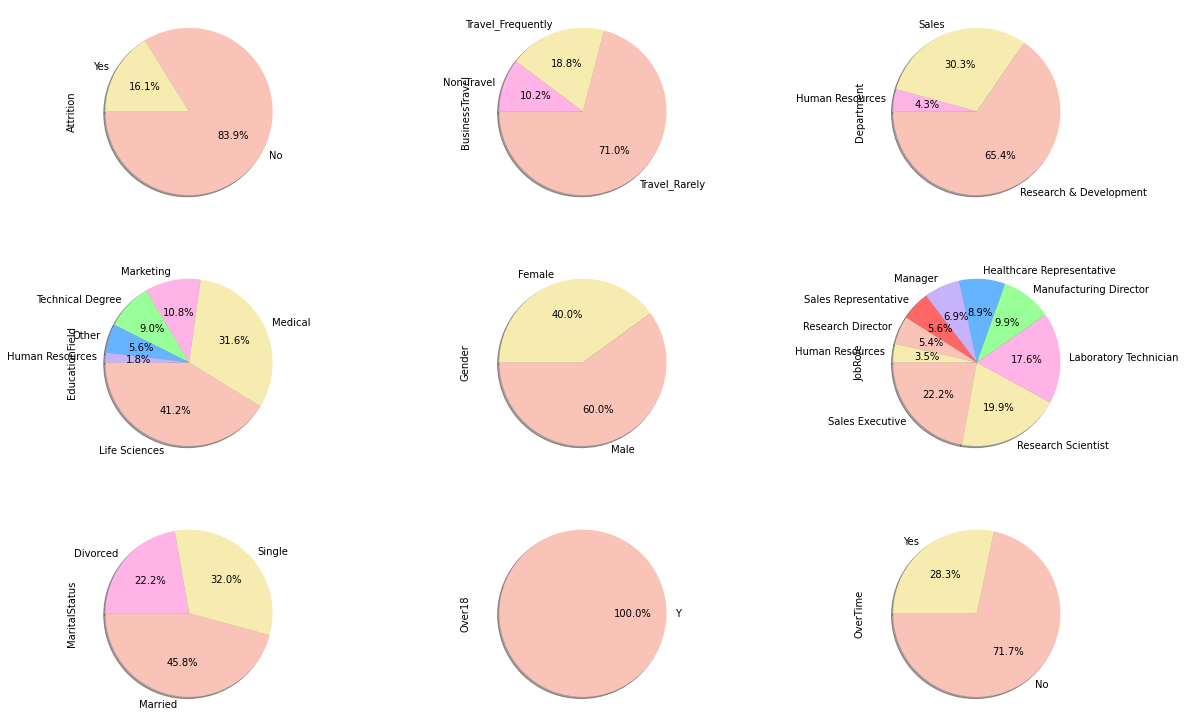

In [270]:
fig=plt.figure(figsize=(20,50))
colors = [ '#f9c3b7','#f7ecb0', '#ffb3e6', '#99ff99', '#66b3ff', '#c7b3fb','#ff6666']
for i in range(len((df_HR.select_dtypes(include='object')).columns)):
    fig.add_subplot(11,3,i+1)
    df_HR.select_dtypes(include='object').iloc[:,i].value_counts().plot(kind="pie", colors=colors, subplots=True,autopct='%1.1f%%',
        shadow=True, startangle=180)

In [271]:
df_HR.drop([ 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1,inplace=True)

Ex-exmployees: median age = 32 years old and standard deviation = 9.7
Current exmployees: median age = 36 years old and standard deviation = 8.9


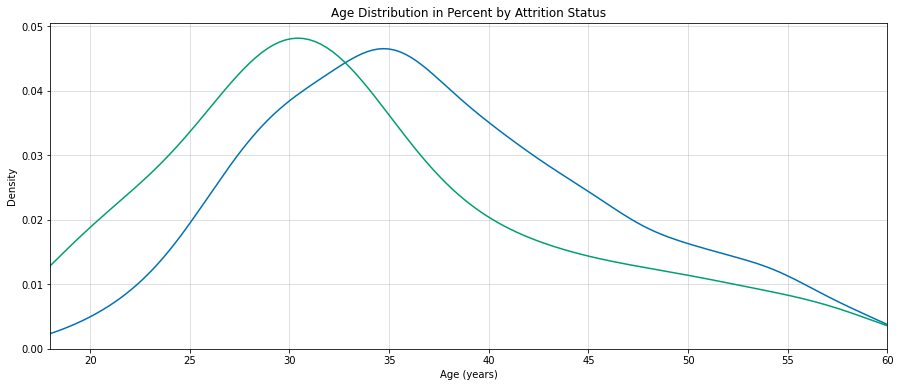

In [272]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'Age'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employees')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Age Distribution in Percent by Attrition Status');
print('Ex-exmployees: median age = {:.0f} years old and standard deviation = {:.1f}'.format(df_HR[df_HR['Attrition']=='Yes']['Age'].median(), df_HR[df_HR['Attrition']=='Yes']['Age'].std()))
print('Current exmployees: median age = {:.0f} years old and standard deviation = {:.1f}'.format(df_HR[df_HR['Attrition']=='No']['Age'].median(), df_HR[df_HR['Attrition']=='No']['Age'].std()))

In [273]:
# Distance from Home
print("Distance from home for employees to get to work is from {} to {} miles.".format(df_HR['DistanceFromHome'].min(),
                                                                                       df_HR['DistanceFromHome'].max()))

Distance from home for employees to get to work is from 1 to 29 miles.


In [274]:
print('Average distance from home for currently active employees: {:.3f} miles and ex-employees: {:.3f} miles'.format(
    df_HR[df_HR['Attrition'] == 'No']['DistanceFromHome'].mean(), df_HR[df_HR['Attrition'] == 'Yes']['DistanceFromHome'].mean()))

Average distance from home for currently active employees: 8.916 miles and ex-employees: 10.633 miles


In [275]:
print('Average distance from home for currently active employees: {:.0f} miles and ex-employees: {:.0f} miles'.format(
    df_HR[df_HR['Attrition'] == 'No']['DistanceFromHome'].median(), df_HR[df_HR['Attrition'] == 'Yes']['DistanceFromHome'].median()))

Average distance from home for currently active employees: 7 miles and ex-employees: 9 miles


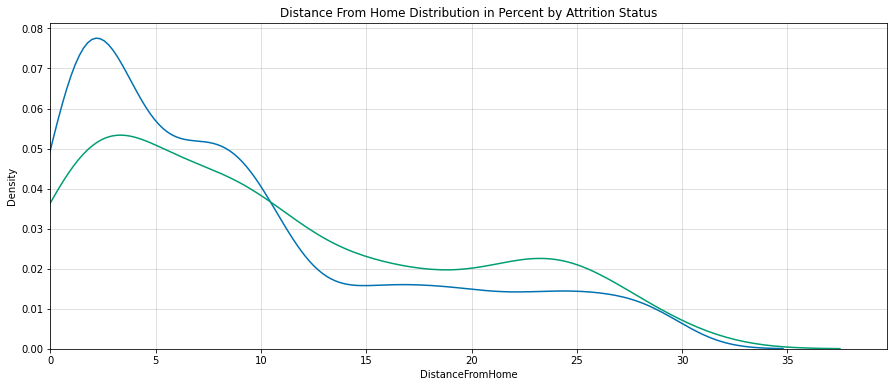

In [276]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'DistanceFromHome'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Ex-Employees')
plt.xlabel('DistanceFromHome')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Distance From Home Distribution in Percent by Attrition Status');

In [277]:
print("Number of Years at the company varies from {} to {} years.".format(
    df_HR['YearsAtCompany'].min(), df_HR['YearsAtCompany'].max()))


Number of Years at the company varies from 0 to 40 years.


In [278]:
print('Ex-exmployees: median number of year at the company = {:.0f} years old and standard deviation = {:.1f}'.format(df_HR[df_HR['Attrition']=='Yes']['YearsAtCompany'].median(), df_HR[df_HR['Attrition']=='Yes']['Age'].std()))
print('Current exmployees: median number of year at the company = {:.0f} years old and standard deviation = {:.1f}'.format(df_HR[df_HR['Attrition']=='No']['YearsAtCompany'].median(), df_HR[df_HR['Attrition']=='No']['Age'].std()))

Ex-exmployees: median number of year at the company = 3 years old and standard deviation = 9.7
Current exmployees: median number of year at the company = 6 years old and standard deviation = 8.9


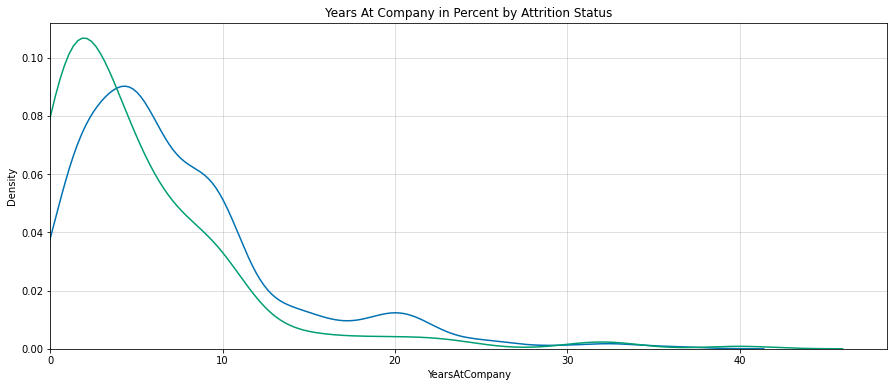

In [279]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'YearsAtCompany'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Ex-Employees')
plt.xlabel('YearsAtCompany')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years At Company in Percent by Attrition Status');

# Target Variable Feature Enginnering
<br>

> The feature 'Attrition' is what this Machine Learning problem is about. We are trying to predict the value of the feature 'Attrition' by using other related features associated with the employee's personal and professional history.



In [280]:
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
df_HR['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [281]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    df_HR[df_HR['Attrition'] == 'No'].shape[0] / df_HR.shape[0]*100,
    df_HR[df_HR['Attrition'] == 'Yes'].shape[0] / df_HR.shape[0]*100))

Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


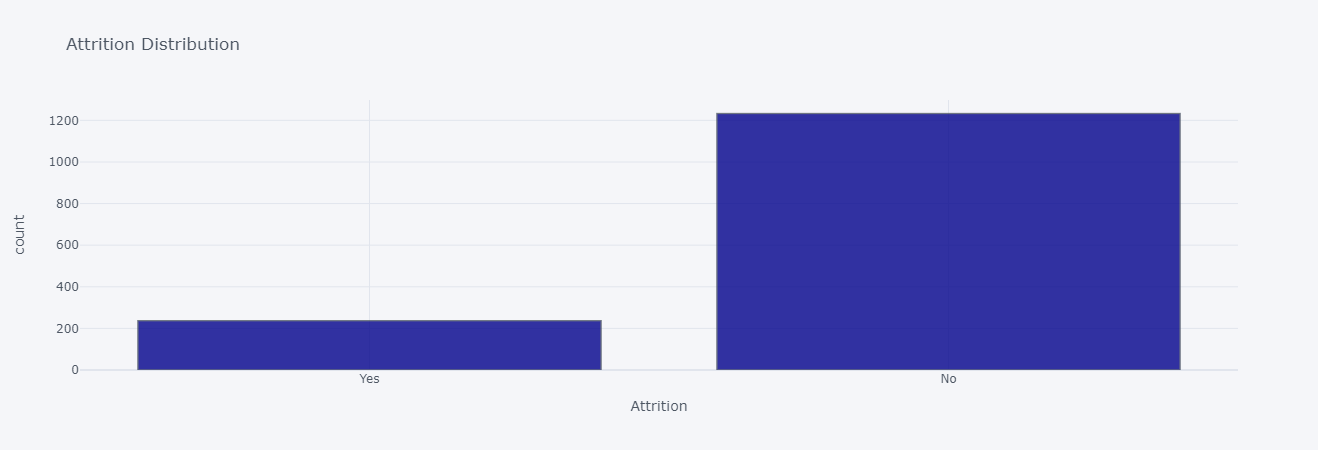

In [282]:
df_HR['Attrition'].iplot(kind='hist', xTitle='Attrition',
                         yTitle='count', title='Attrition Distribution', color='darkblue')

As shown on the chart above, we see this is an imbalanced class problem. Indeed, the percentage of Current Employees in our dataset is 83.9% and the percentage of Ex-employees is: 16.1%

Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.

In [283]:
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    out=[]
    for i in df:
        if (i > q3 or i < q1) and i>0:
            out.append(i)
    print("Outliers:",out)
    return out;
def remove_outliers(df):
    print("Registers in the initial dataset:",df.shape[0])
    for col in df.columns[1:]:
        if df[col].dtype != 'object':
            print(col)
            data_filter = Winsorization_outliers(df[col])
            df = df[~df[col].isin(data_filter)]
            print("Registers without outliers in "+col+" :"+ str(df.shape[0]))
    return df;


df_HR_Cleaned = remove_outliers(df_HR)
        

Registers in the initial dataset: 1470
DailyRate
Outliers: [103, 1488, 111, 1496, 111, 106, 1490, 1490, 1499, 1495, 102, 109, 1492, 111, 116, 107, 1498, 1495, 1490, 1496, 115, 104, 1495, 1490, 116, 105]
Registers without outliers in DailyRate :1444
DistanceFromHome
Outliers: []
Registers without outliers in DistanceFromHome :1444
Education
Outliers: []
Registers without outliers in Education :1444
EnvironmentSatisfaction
Outliers: []
Registers without outliers in EnvironmentSatisfaction :1444
HourlyRate
Outliers: []
Registers without outliers in HourlyRate :1444
JobInvolvement
Outliers: []
Registers without outliers in JobInvolvement :1444
JobLevel
Outliers: []
Registers without outliers in JobLevel :1444
JobSatisfaction
Outliers: []
Registers without outliers in JobSatisfaction :1444
MonthlyIncome
Outliers: [1232, 19926, 1102, 19999, 1200, 1009, 1281, 19859, 1051, 19973, 19845, 1052, 19627, 19943, 19740, 1223, 1118, 19847, 19717, 19701, 1359, 1261, 1274, 19658, 19833, 19665, 1081, 109

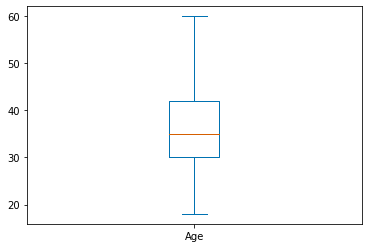

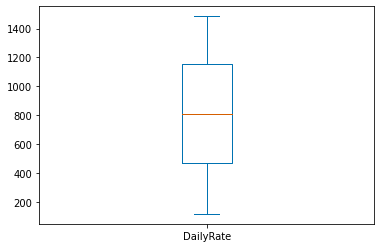

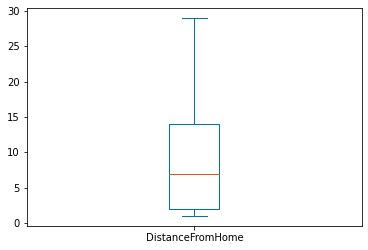

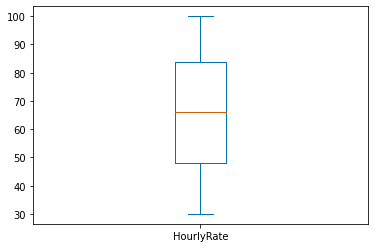

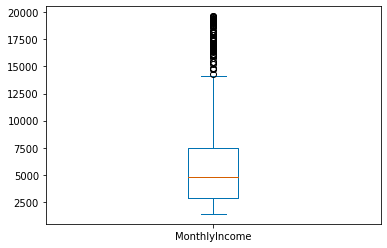

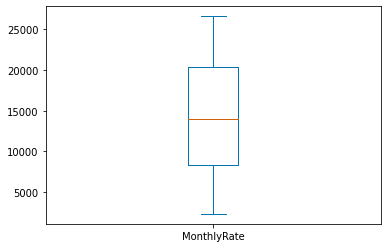

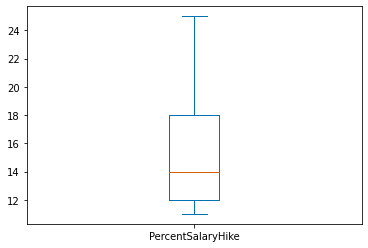

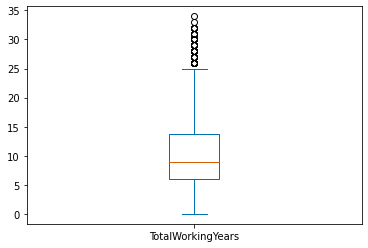

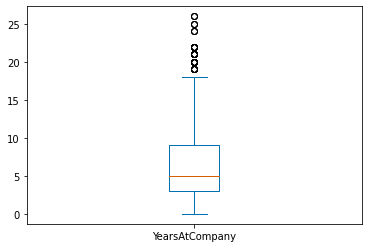

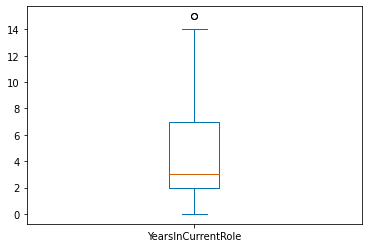

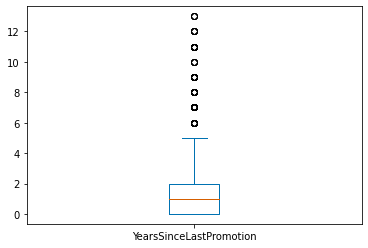

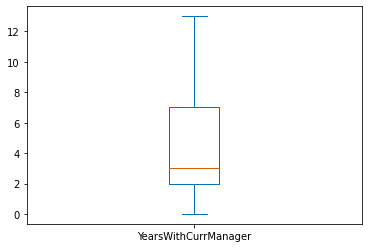

In [284]:
for col in df_HR_Cleaned.columns:
    if (df_HR_Cleaned[col].dtype != 'object') & (len(df_HR_Cleaned[col].unique()) > 10):
        df_HR_Cleaned[col].plot(kind='box')
        plt.show()

In [285]:
#from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
#o=OrdinalEncoder()
#l=LabelEncoder()
#df_HR_Cleaned['Attrition']=l.fit_transform(df_HR_Cleaned['Attrition'])

Attrition_map = {
    'No': 0,
    'Yes': 1
}
df_HR_Cleaned['Attrition'] = df_HR_Cleaned['Attrition'].map(Attrition_map)


In [286]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df_HR_Cleaned.columns[1:]:
    if df_HR_Cleaned[col].dtype == 'object':
        if len(list(df_HR_Cleaned[col].unique())) <= 2:
            le.fit(df_HR_Cleaned[col])
            df_HR_Cleaned[col] = le.transform(df_HR_Cleaned[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

# convert rest of categorical variable into dummy
df_HR_Cleaned = pd.get_dummies(df_HR_Cleaned, drop_first=True)

2 columns were label encoded.


In [287]:
print(df_HR.shape)
df_HR.head()

(1470, 31)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [288]:
df_HR_Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1326 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1326 non-null   int64
 1   Attrition                          1326 non-null   int64
 2   DailyRate                          1326 non-null   int64
 3   DistanceFromHome                   1326 non-null   int64
 4   Education                          1326 non-null   int64
 5   EnvironmentSatisfaction            1326 non-null   int64
 6   Gender                             1326 non-null   int64
 7   HourlyRate                         1326 non-null   int64
 8   JobInvolvement                     1326 non-null   int64
 9   JobLevel                           1326 non-null   int64
 10  JobSatisfaction                    1326 non-null   int64
 11  MonthlyIncome                      1326 non-null   int64
 12  MonthlyRate         

In [289]:
#Function to choose the right threshold 
def outliersz(z,df):
    for i in np.arange(3,5,0.2):
        data=df.copy()
        data=data[(z<i).all(axis=1)]
        loss=(df.shape[0]-data.shape[0])/df.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2)))

In [290]:
#Using zscore method to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df_HR_Cleaned))
outliersz(z,df_HR_Cleaned)
#print(df_HR_Cleaned.shape)
#df_HR_Cleaned=df_HR_Cleaned[(z<4.8).all(axis=1)]
#print(df_HR_Cleaned.shape)

With threshold 3.0 data loss is 32.73%
With threshold 3.2 data loss is 31.9%
With threshold 3.4 data loss is 25.04%
With threshold 3.6 data loss is 23.91%
With threshold 3.8 data loss is 23.53%
With threshold 4.0 data loss is 18.78%
With threshold 4.2 data loss is 12.97%
With threshold 4.4 data loss is 7.99%
With threshold 4.6 data loss is 7.99%
With threshold 4.8 data loss is 3.62%


In [291]:
df_HR_Cleaned.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [293]:
# Find correlations with the target and sort
df_HR_trans = df_HR_Cleaned.copy()
correlations = df_HR_trans.corr()['Attrition'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(6))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 JobRole_Laboratory Technician       0.096383
BusinessTravel_Travel_Frequently    0.101192
JobRole_Sales Representative        0.126273
MaritalStatus_Single                0.162459
OverTime                            0.258722
Attrition                           1.000000
Name: Attrition, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.173645
JobLevel             -0.168610
YearsInCurrentRole   -0.161682
YearsAtCompany       -0.161621
MonthlyIncome        -0.156389
Name: Attrition, dtype: float64


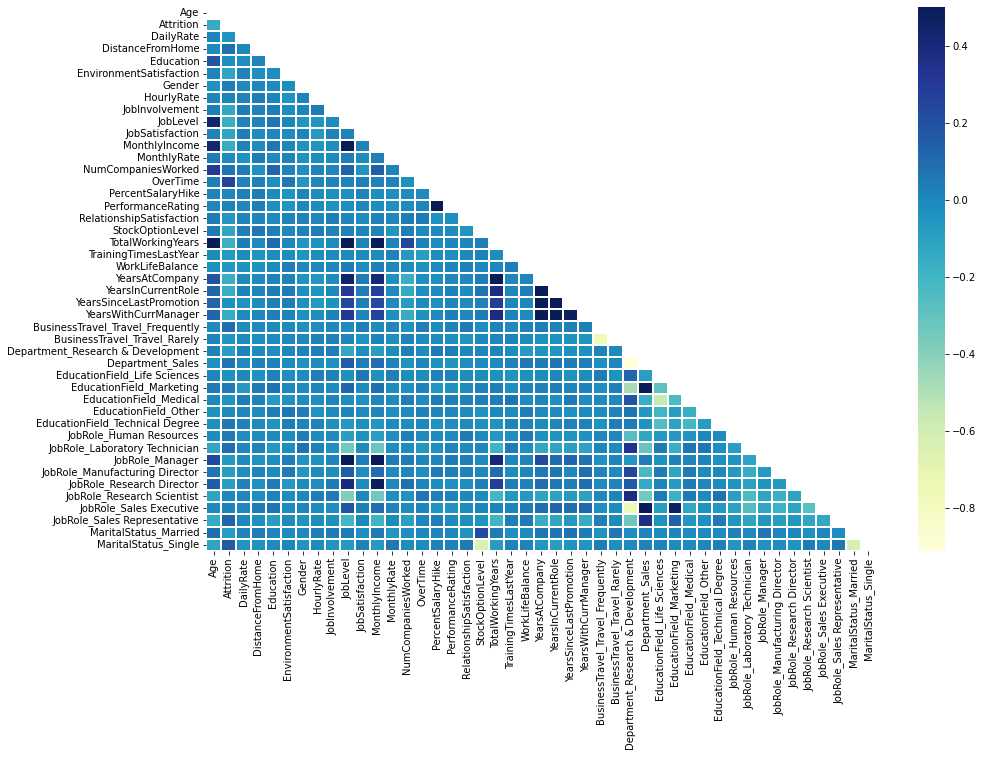

In [294]:
# Calculate correlations
corr = df_HR_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            #annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu");

In [297]:
from sklearn.decomposition import PCA

training_data = df_HR_Cleaned.copy()
pca = PCA(n_components=2, svd_solver= 'full')
X_train_PCA = pca.fit_transform(training_data)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = training_data.index
X_train_PCA.head()

,0,1
0,5250.573369,-220.890179
1,10652.837618,-1243.963306
2,-11939.659596,-3622.823756
3,8838.312655,-3410.295747
4,2332.176209,-2662.927045


In [301]:
#pca.explained_variance_ratio_
print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )

Components =  2 ;
Total explained variance =  0.99758


In [298]:
def cov_matrix(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")
def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md
def MD_detectOutliers(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)
    return np.array(outliers)
def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False
data_train = np.array(X_train_PCA.values)
cov_matrix, inv_cov_matrix  = cov_matrix(data_train)
mean_distr = data_train.mean(axis=0)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train, extreme = True)
threshold


3.7989026687412326

(0.0, 15.0)

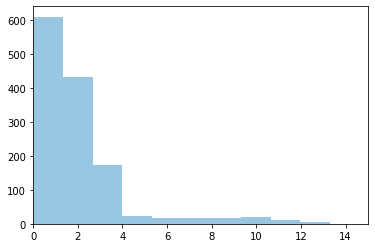

In [299]:
plt.figure()
sns.distplot(np.square(dist_train),
             bins = 10, 
             kde= False);
plt.xlim([0.0,15])

Text(0.5, 0, 'Mahalanobis dist')

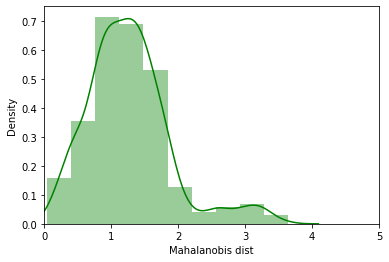

In [302]:
plt.figure()
sns.distplot(dist_train,
             bins = 10, 
             kde= True, 
            color = 'green');
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')

In [303]:
threshold = 3.4

In [304]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index

In [305]:
anomaly_train['Anomaly'].value_counts()


False    1321
True        5
Name: Anomaly, dtype: int64

In [306]:
training_data = training_data[~anomaly_train['Anomaly']]


In [307]:
training_data.shape


(1321, 45)

In [308]:
target_variable_name = 'Attrition'


In [309]:
training_values = training_data[target_variable_name]


In [310]:
training_values.shape


(1321,)

In [311]:
training_points = training_data.drop(target_variable_name, axis=1)


In [312]:
training_points.shape


(1321, 44)

In [314]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, average_precision_score, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

In [315]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [316]:
clf1 = LogisticRegression(random_state=1)


In [317]:
clf2 = RandomForestClassifier(random_state=1)
clf3 = xgb.XGBClassifier(eval_metric='auc', objective='binary:logistic', alpha=1)
eclf = VotingClassifier(estimators=[ ('lr', clf1), ('rf', clf2),('xgb', clf3)], voting='soft')
eclf_params = {
    'lr__C': np.linspace(1, 3, 10),
    'lr__penalty':['l1', 'l2'],
    
    'rf__n_estimators' : list(range(50, 101, 10)),
    'rf__max_features': ['auto', 'log2'],
    
    'xgb__subsample': [0.8, 0.9],
    'xgb__colsample_bytree': np.linspace(0.6, 1, 5),
    'xgb__eta': np.linspace(0.001, 0.5, 20),
    'xgb__n_estimators': [100, 250, 500],
    'xgb__max_depth': [4, 5, 6],
    'xgb__min_child_weight': [2, 3, 4],
}
voting_clf = RandomizedSearchCV(eclf, eclf_params, random_state=0, scoring='roc_auc', cv=skfold)

In [318]:
%%time
voting_search = voting_clf.fit(training_points, training_values)

CPU times: user 3min 24s, sys: 15.3 s, total: 3min 39s
Wall time: 1min


In [319]:
voting_search.best_score_


0.8205655709075682

In [320]:
voting_search.best_params_


{'xgb__subsample': 0.9,
 'xgb__n_estimators': 500,
 'xgb__min_child_weight': 4,
 'xgb__max_depth': 6,
 'xgb__eta': 0.2373684210526316,
 'xgb__colsample_bytree': 0.9,
 'rf__n_estimators': 90,
 'rf__max_features': 'log2',
 'lr__penalty': 'l2',
 'lr__C': 1.0}

In [321]:
best_model = voting_search.best_estimator_
